<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/05_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#k-최근접 이웃 회귀 모델은 이웃 샘플들의 무게를 평균화하기 때문에
#훈련 데이터의 범위를 벗어나면 이상한 값을 예측할 수 있다.
#선형회귀를 통해 문제를 해결한다.

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

knr.predict([[50]])

# 50cm 농어의 실제 무게는 1500g인데 1004g로 잘못 예측
# k-최근접 이웃 회귀 알고리즘은 근처 이웃들 값의 평균이기 때문에
# 훈련 모델의 범위를 넘어서면 예측할 수 없음

array([1033.33333333])

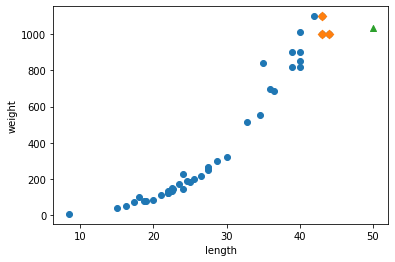

In [11]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(50, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

##이웃 데이터가 샘플값과 차이가 있음

In [13]:
print(np.mean(train_target[indexes])) #50cm
print(knr.predict([[100]])) #100cm
#예측한 샘플 타깃은 이웃 데이터의 평균임을 알 수 있음

1033.3333333333333
[1033.33333333]


In [15]:
#선형 회기 알고리즘
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))
#50cm 농어 값을 예측함
# 선형회귀의 그래프는 y = ax + b 꼴
print(lr.coef_, lr.intercept_) #a, b

[1224.64995442]
[37.77304367] -664.002228934682


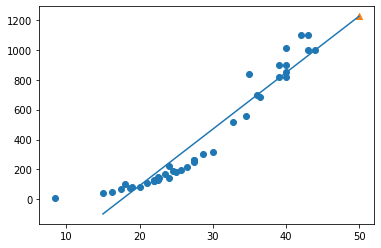

In [18]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_]) #.선형회귀  그래프
plt.scatter(50, lr.predict([[50]]), marker="^") # 50cm 농어
plt.xlabel = "length"
plt.ylabel = "weight"
plt.show()

#이 그래프에서 y가 음수가 되는 일도 발생할 수 있음

In [51]:
# 다항 회귀
# 2차 방정식 그리기, 길이를 제곱한 항을 훈련 세트에 추가

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]])) #길이가 50cm인 농어 무게 예측
print(lr.coef_, lr.intercept_) # y = ax2 + bx + c 에서 a,b,c 값

# 무게 = 1.05 * 길이^2 - 23.14 * 길이 + 132.28 라는 식을 학습함
# 다항식을 사용한 선형 회귀를 다항회귀 라고 부름

[1602.09566089]
[  1.05069745 -23.1385971 ] 132.28189533175203


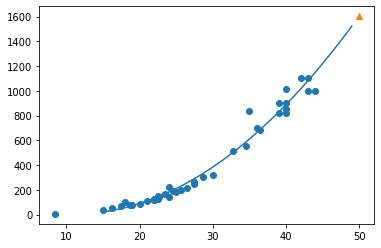

In [54]:
# 다항회귀 그래프 그려보기
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.scatter(50, 1602.09, marker="^")

plt.show()

In [55]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 훈련 세트의 결정계수가 테스트 세트의 결정계수보다 크고
# 테스트세트의 점수가 나쁘지 않기 때문에 적절하다.

0.9741365873832454
0.958600635034071
